In [1]:
import platform
import os
from datetime import datetime

import numpy as np
from matplotlib import pyplot as plt

from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector

In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 5  # Number of files to process at once
elif platform.system() == 'Linux':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 0.2  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'urw_inter_fe55_selftrig_3-26-25'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'hv_410'

det_single = 'urw_inter'

# file_nums = [0]
file_nums = 'all'

noise_threshold_sigmas = 3

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'

try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [3]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [4]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')

print(f'Detector center: {det.center}')
print(f'Detector active size: {det.active_size}')

# det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, hist_raw_amps=True, save_waveforms=True)
det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, hist_raw_amps=True, save_waveforms=False)
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [1, 2, 3, 4]
HV: {'drift': 800, 'resist_1': 410}
Detector center: [ 10.   40.  712.7]
Detector active size: [127.125 127.      4.   ]
Reading in data...


100%|██████████| 3/3 [00:34<00:00, 11.43s/it]


Read in data shape: (69077, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 16.25it/s]


Fitting time: 1.367983102798462 s
Processed sub-chunk 1/1
Processed chunk 1/1
Getting hits...
Hits shape: (69077, 256)


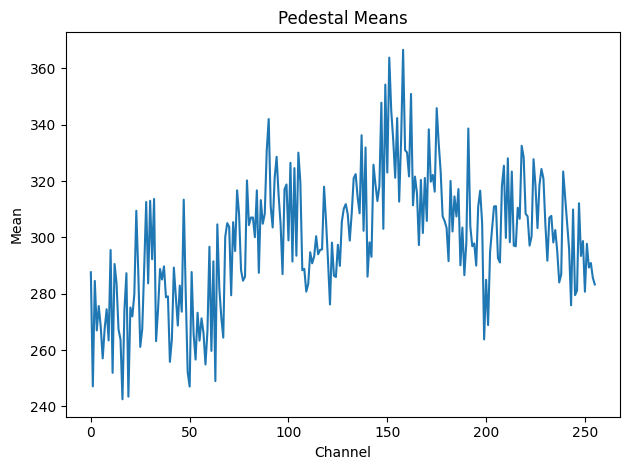

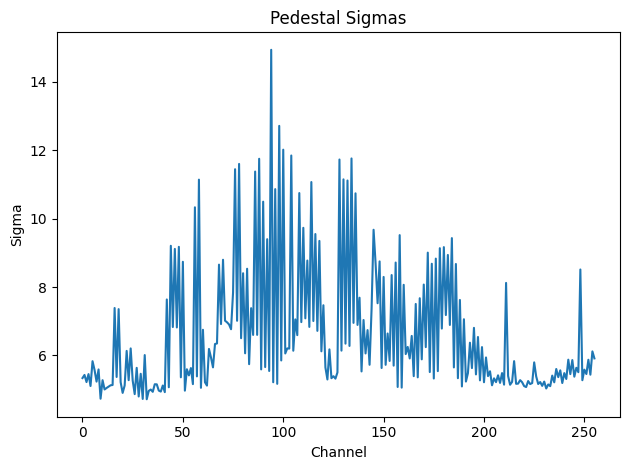

In [5]:
det.dream_data.plot_pedestals()

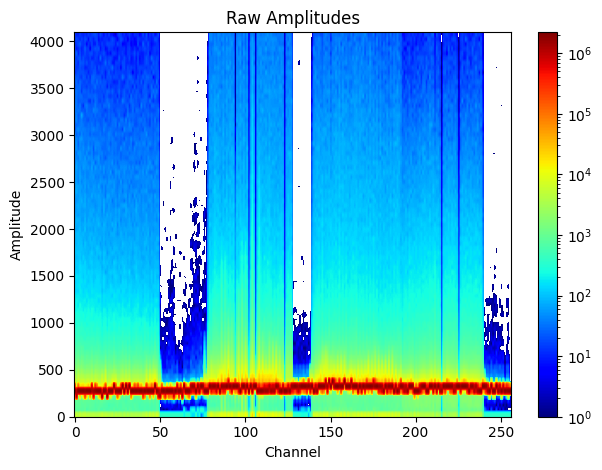

In [6]:
det.dream_data.plot_raw_amps_2d_hist()

In [7]:
# for event_num in range(min(len(det.dream_data.hits), 20)):
    # det.plot_event_1d(event_num)
    # det.plot_event_2d(event_num)
    # det.dream_data.plot_waveforms(event_num)

In [8]:
# det.dream_data.plot_noise_metric()

Connector 1 Dead Strips: []
Connector 2 Dead Strips: []
Connector 3 Dead Strips: []
Connector 4 Dead Strips: []


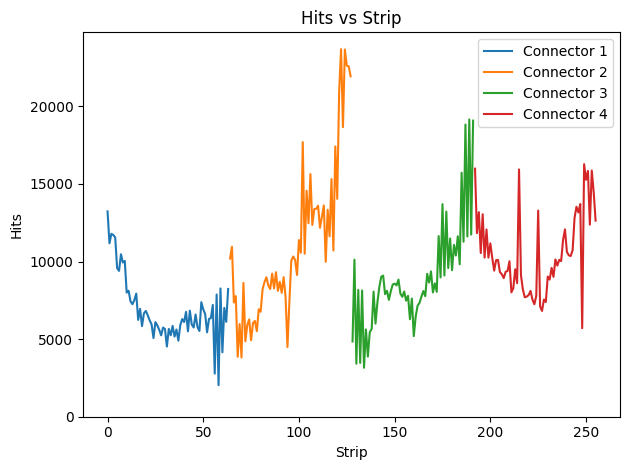

In [9]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

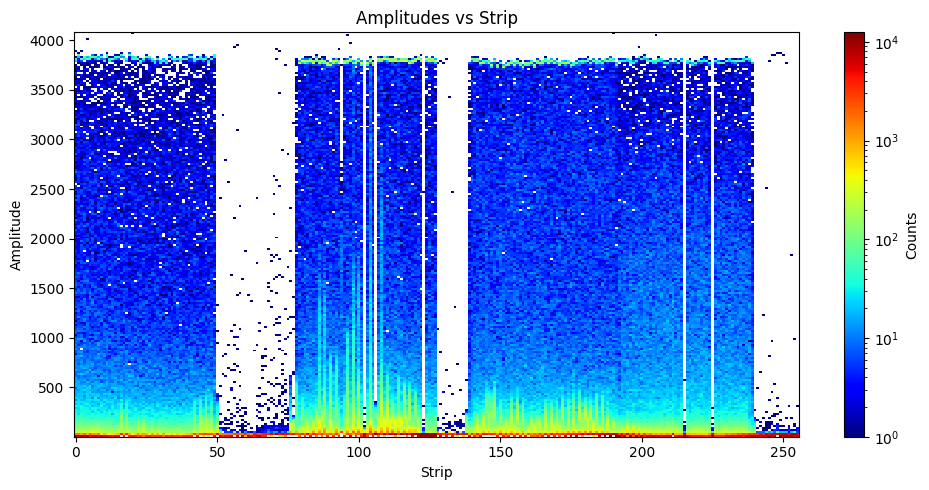

In [10]:
det.dream_data.plot_amplitudes_vs_strip()

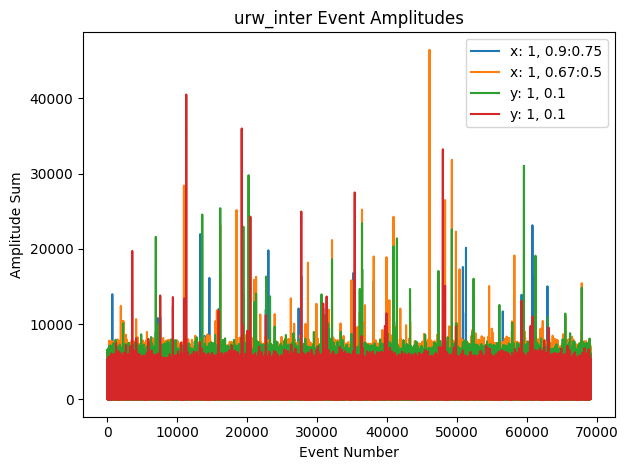

In [11]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

# if realign_dream:
#     det.add_rotation(90, 'z')

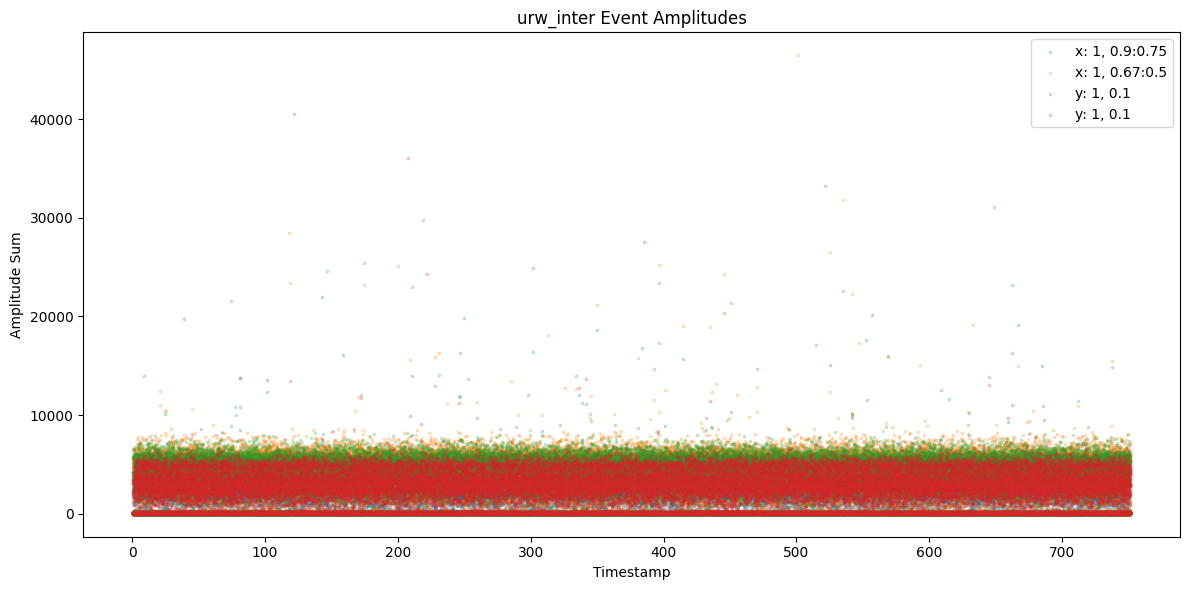

In [12]:
start_date_time = datetime(2025, 2, 27, 17, 25)
# det.plot_xy_amp_sum_vs_timestamp(x_range=(0, 2.7e13 / 1e8), t_start=start_date_time)
det.plot_xy_amp_sum_vs_timestamp()
# det.plot_xy_amp_sum_vs_timestamp(t_start=start_date_time)

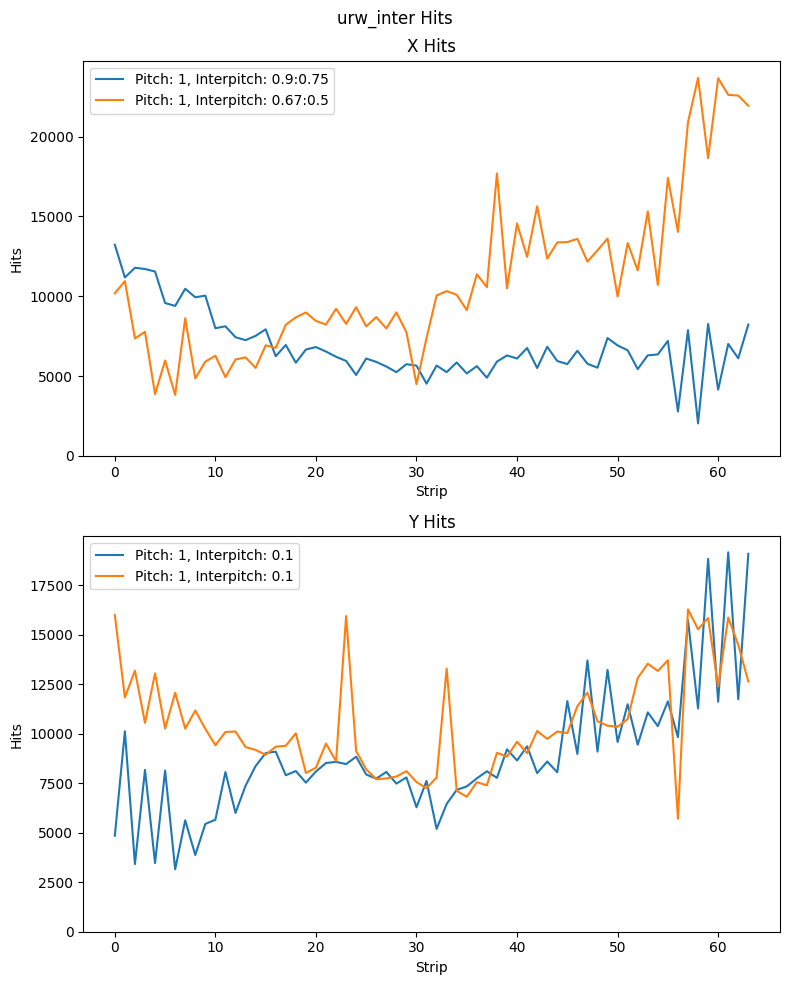

In [13]:
det.plot_hits_1d()

In [14]:
print(len(det.dream_data.hits))

69077


In [15]:
# for event_num in range(min(len(det.dream_data.hits), 2)):
#     det.plot_event_1d(event_num)
#     det.plot_event_2d(event_num)
#     det.dream_data.plot_waveforms(event_num)

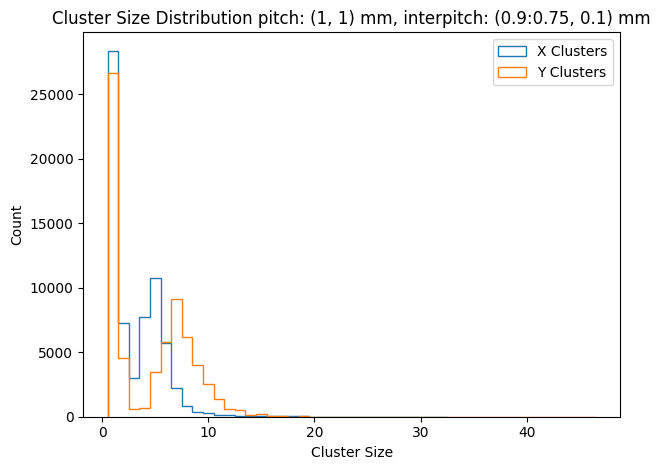

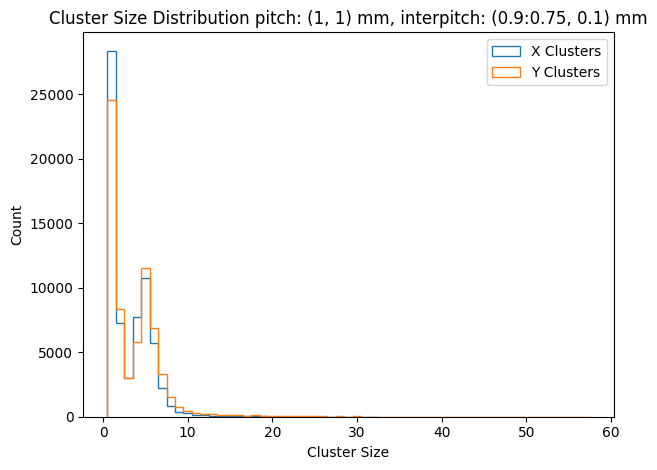

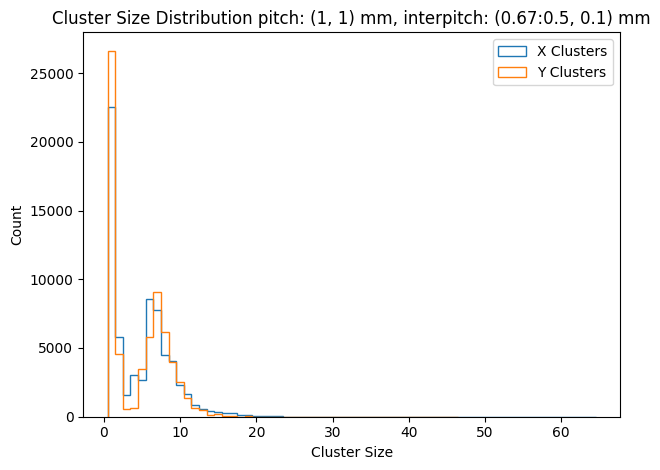

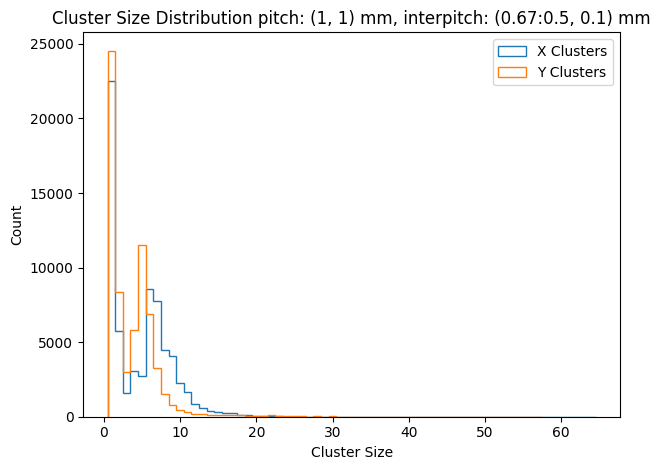

In [16]:
for sub_det in det.sub_detectors:
    sub_det.plot_cluster_sizes()

In [17]:
det.get_det_clusters()

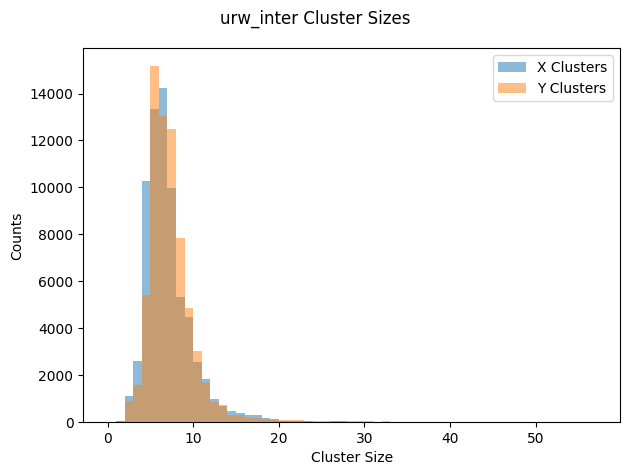

In [18]:
det.plot_cluster_sizes()

(69077,)


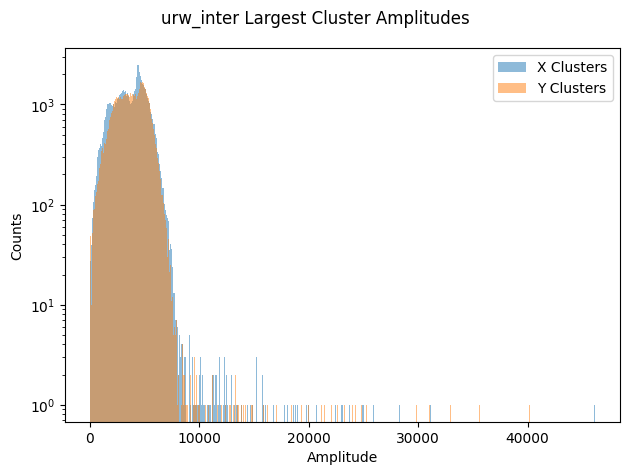

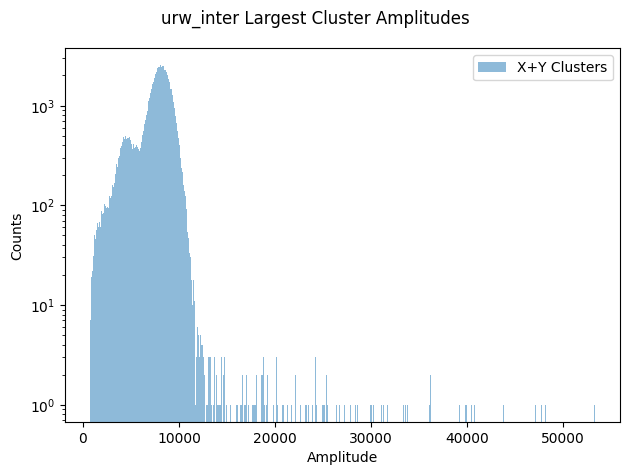

In [19]:
det.plot_cluster_amps()

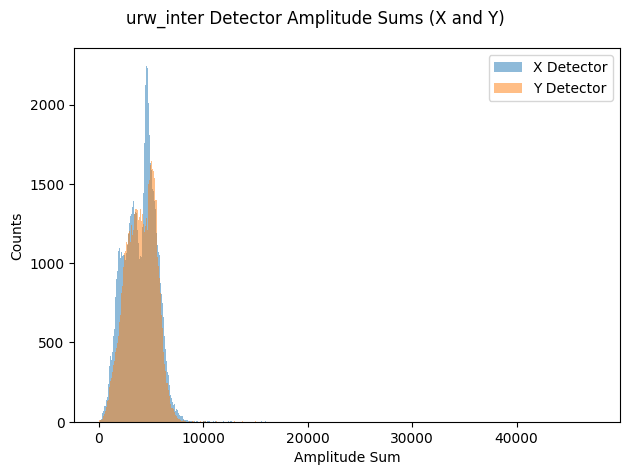

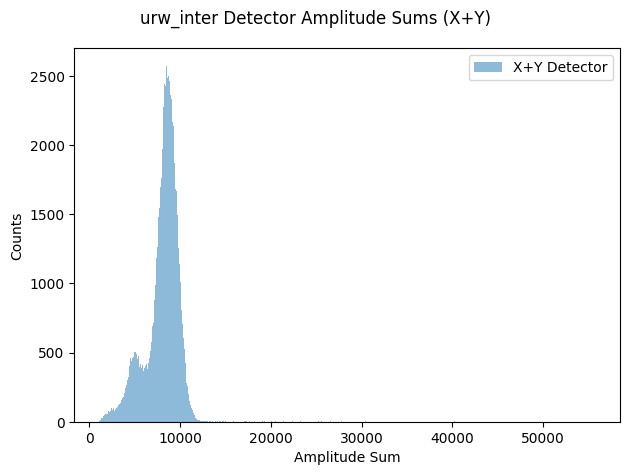

In [20]:
det.plot_det_amp_sums()

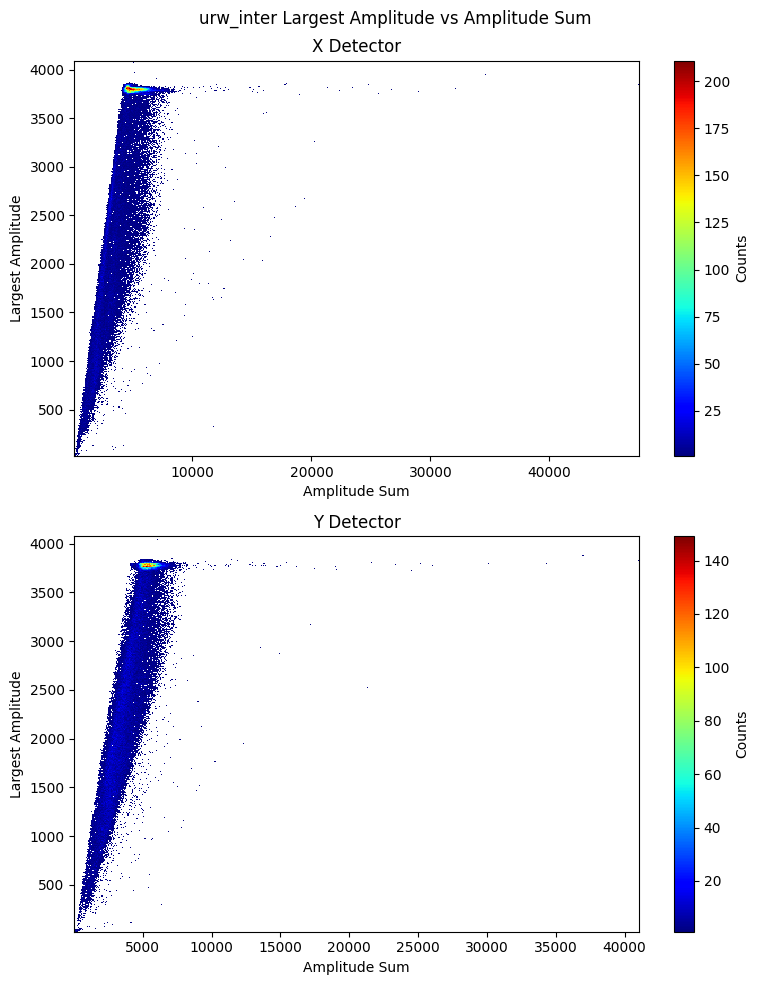

In [21]:
det.plot_det_largest_amp_vs_amp_sums(bins=500)

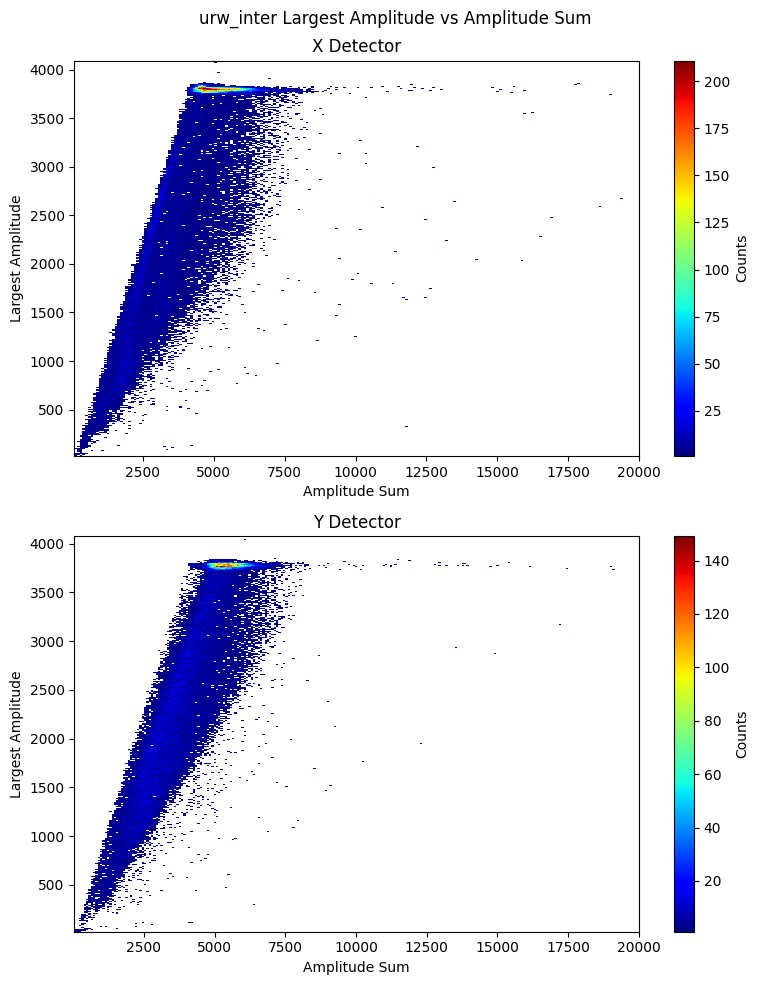

In [22]:
det.plot_det_largest_amp_vs_amp_sums(bins=500, x_max=20000)

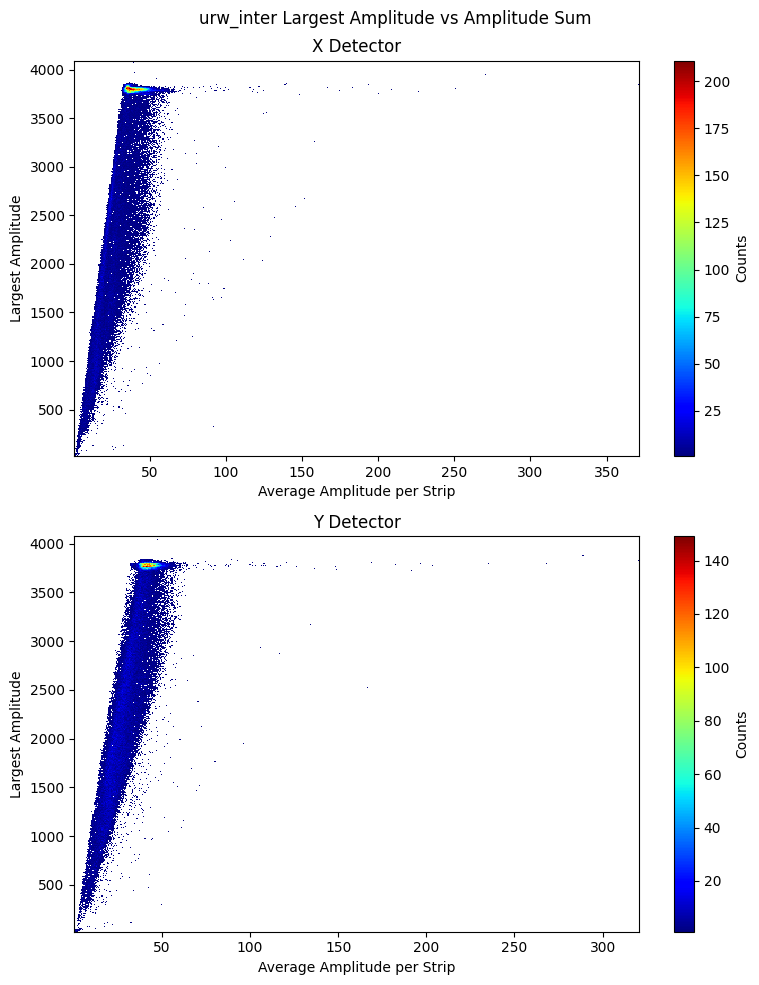

In [23]:
det.plot_det_largest_amp_vs_amp_sums(bins=500, norm_per_strip=True)

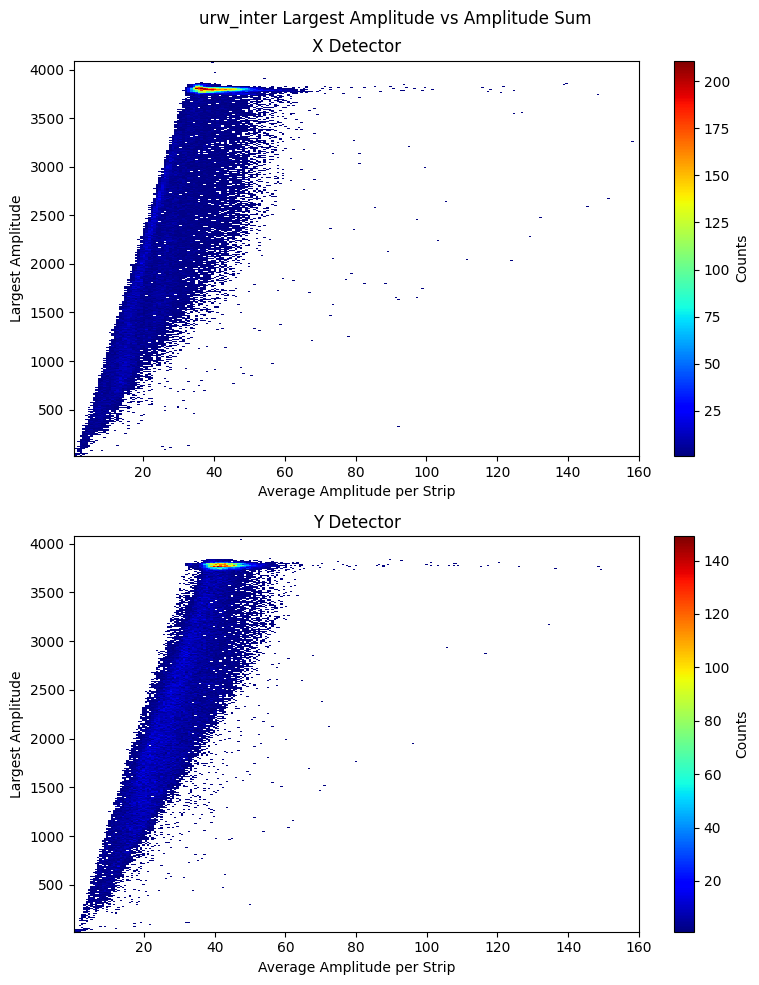

In [24]:
det.plot_det_largest_amp_vs_amp_sums(bins=500, x_max=160, norm_per_strip=True)

In [25]:
from scipy.optimize import curve_fit as cf
def gaus(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

HV: {'drift': 800, 'resist_1': 380}
Reading in data...


100%|██████████| 2/2 [00:13<00:00,  6.68s/it]


Read in data shape: (36189, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 31.34it/s]


Fitting time: 0.6814563274383545 s
Processed sub-chunk 1/1
Processed chunk 1/1
Getting hits...
HV: hv_380 sum of sums: 101055494.13695386
p0: [2240.0, 2825.0, 367.25]
HV: {'drift': 800, 'resist_1': 385}
Reading in data...


100%|██████████| 2/2 [00:13<00:00,  6.79s/it]


Read in data shape: (42926, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 26.35it/s]


Fitting time: 0.795635461807251 s
Processed sub-chunk 1/1
Processed chunk 1/1
Getting hits...
HV: hv_385 sum of sums: 139680173.84959155
p0: [2171.0, 3375.0, 438.75]
HV: {'drift': 800, 'resist_1': 390}
Reading in data...


100%|██████████| 2/2 [00:13<00:00,  6.86s/it]


Read in data shape: (48784, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 23.43it/s]


Fitting time: 0.9060842990875244 s
Processed sub-chunk 1/1
Processed chunk 1/1
Getting hits...
HV: hv_390 sum of sums: 186901353.9565418
p0: [2023.0, 4075.0, 529.75]
HV: {'drift': 800, 'resist_1': 395}
Reading in data...


100%|██████████| 3/3 [00:15<00:00,  5.29s/it]


Read in data shape: (54862, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 16.77it/s]


Fitting time: 1.091728687286377 s
Processed sub-chunk 1/1
Processed chunk 1/1
Getting hits...
HV: hv_395 sum of sums: 250039104.03614932
p0: [1894.0, 4825.0, 627.25]
HV: {'drift': 800, 'resist_1': 400}
Reading in data...


100%|██████████| 3/3 [00:17<00:00,  5.77s/it]


Read in data shape: (60803, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:00<00:00, 17.73it/s]


Fitting time: 1.1659696102142334 s
Processed sub-chunk 1/1
Processed chunk 1/1
Getting hits...
HV: hv_400 sum of sums: 335209845.5086595
p0: [1637.0, 5825.0, 757.25]
HV: {'drift': 800, 'resist_1': 405}
Reading in data...


100%|██████████| 3/3 [00:17<00:00,  5.73s/it]


Read in data shape: (65488, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:01<00:00, 13.78it/s]


Fitting time: 1.3174810409545898 s
Processed sub-chunk 1/1
Processed chunk 1/1
Getting hits...
HV: hv_405 sum of sums: 439302577.29406893
p0: [1478.0, 7425.0, 965.25]
HV: {'drift': 800, 'resist_1': 410}
Reading in data...


100%|██████████| 3/3 [00:16<00:00,  5.52s/it]


Read in data shape: (69077, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:01<00:00, 13.90it/s]


Fitting time: 1.3009617328643799 s
Processed sub-chunk 1/1
Processed chunk 1/1
Getting hits...
HV: hv_410 sum of sums: 554686402.0557449
p0: [1186.0, 8475.0, 1101.75]


Text(0, 0.5, 'Number of Events')

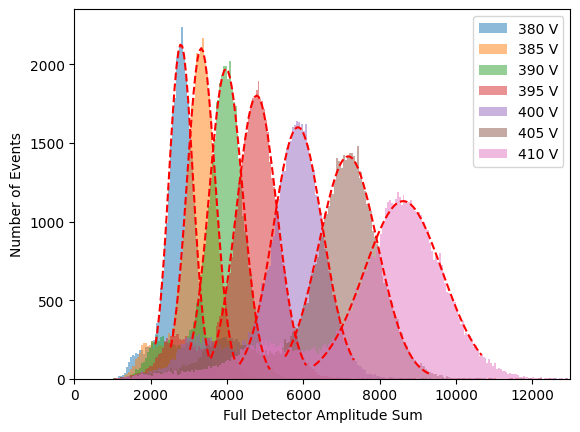

In [30]:
hvs = [380, 385, 390, 395, 400, 405, 410]
binning = np.arange(0, 13000, 50)
# hvs = [380, 410]
means, mean_x_largest_amp, mean_y_largest_amp = [], [], []
fig, ax = plt.subplots()
for hv in hvs:
    sub_run_name = f'hv_{hv}'
    data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
    ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'

    det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
    det = DreamDetector(config=det_config)
    print(f'HV: {det.hv}')

    det.load_dream_data(data_dir, ped_dir, noise_threshold_sigmas, file_nums, chunk_size, hist_raw_amps=False, save_waveforms=False)
    det.make_sub_detectors()
    det.get_det_clusters()
    x_largest_amp = np.array(det.x_largest_amp)
    y_largest_amp = np.array(det.y_largest_amp)
    xy_det_sum = np.array(det.xy_det_sum)
    print(f'HV: {sub_run_name} sum of sums: {np.sum(xy_det_sum)}')
    hist, bin_edges, _ = ax.hist(xy_det_sum, bins=binning, alpha=0.5, label=f'{hv} V')
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    p0 = [np.max(hist), bin_centers[np.argmax(hist)], bin_centers[np.argmax(hist)] * 0.13]
    print(f'p0: {p0}')
    fit_range = [p0[1] - 2 * p0[2], p0[1] + 2 * p0[2]]
    fit_filter = (bin_centers > fit_range[0]) & (bin_centers < fit_range[-1])
    x_fit, y_fit = bin_centers[fit_filter], hist[fit_filter]
    popt, pcov = cf(gaus, x_fit, y_fit, p0=p0)
    ax.plot(x_fit, gaus(x_fit, *popt), '--', color='r')

    means.append(popt[1])
    xy_det_sum_filter = (xy_det_sum > fit_range[0]) & (xy_det_sum < fit_range[1])
    mean_x_largest_amp.append(np.median(x_largest_amp[xy_det_sum_filter]))
    mean_y_largest_amp.append(np.median(y_largest_amp[xy_det_sum_filter]))

ax.legend()
ax.set_xlim(0, 13000)
ax.set_xlabel('Full Detector Amplitude Sum')
ax.set_ylabel('Number of Events')

[2792.103730933854, 3320.9407283154997, 3971.120861331559, 4779.014899736157, 5858.672757316999, 7175.844663714245, 8615.290039744195]
[380, 385, 390, 395, 400, 405, 410]


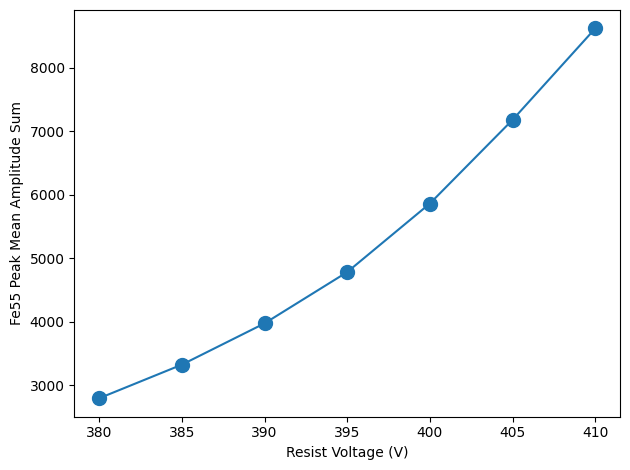

In [27]:
fig_means, ax_means = plt.subplots()
ax_means.clear()
print(means)
print(hvs)
ax_means.plot(hvs, means, marker='o', markersize=10)
ax_means.set_xlabel('Resist Voltage (V)')
ax_means.set_ylabel('Fe55 Peak Mean Amplitude Sum')
fig_means.tight_layout()

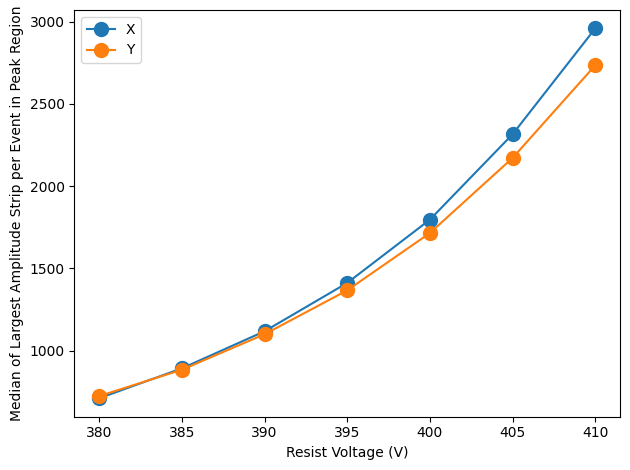

In [28]:
fig_largest_amps, ax_largest_amps = plt.subplots()
ax_largest_amps.clear()
ax_largest_amps.plot(hvs, mean_x_largest_amp, marker='o', markersize=10, label='X')
ax_largest_amps.plot(hvs, mean_y_largest_amp, marker='o', markersize=10, label='Y')
ax_largest_amps.set_xlabel('Resist Voltage (V)')
ax_largest_amps.set_ylabel('Median of Largest Amplitude Strip per Event in Peak Region')
ax_largest_amps.legend()
fig_largest_amps.tight_layout()
